# 4.10 . EXTRA. ADDITIONAL CHARTS 

In [1]:
# import all libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating a shortcut to access the Instacart Basket data as path

path= r'C:\Users\carol\Documents\20.06 Instacart Basket Analysis'

In [3]:
# importing data merge with customers

df_total_high_dept= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_total_high_dept.pkl'))

In [4]:
# As the graphic contains too much information I am selecting the departments with over 100K counts

departments_of_interest = ['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry', 'bakery', 'canned food', 'deli']

In [5]:
# Filtering DF including only the department information needed

filter_df_total_high_dept= df_total_high_dept[df_total_high_dept['department'].isin(departments_of_interest)]

In [6]:
# Create the crosstab

dow_department2 = pd.crosstab(filter_df_total_high_dept['order_dow'], filter_df_total_high_dept['department'], dropna=False)

Text(0, 0.5, 'Count')

<Figure size 8000x8000 with 0 Axes>

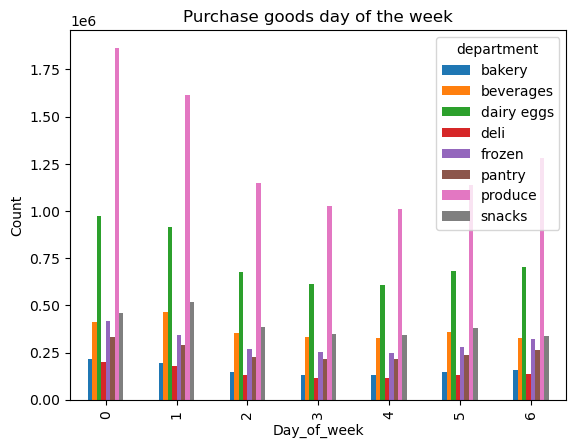

In [7]:
#Creating bar chart to visualise the data distribution

bar_dow_department=plt.figure(figsize=(80,80))
dow_department2 .plot(kind='bar')

# Add Title and tags
plt.title('Purchase goods day of the week')
plt.xlabel('Day_of_week')
plt.ylabel('Count')

In [8]:
# 5. Profile based on prices 

df_total_high_dept.loc[df_total_high_dept['prices'] < 5, 'price_group'] = 'low price'
df_total_high_dept.loc[(df_total_high_dept['prices'] >= 5) & (df_total_high_dept['prices'] <= 10), 'price_group'] = 'low-mid price'
df_total_high_dept.loc[(df_total_high_dept['prices'] > 10) & (df_total_high_dept['prices'] <= 15), 'price_group'] = 'mid price'
df_total_high_dept.loc[(df_total_high_dept['prices'] > 15) & (df_total_high_dept['prices'] <= 20), 'price_group'] = 'mid-high price'
df_total_high_dept.loc[df_total_high_dept['prices'] > 20, 'price_group'] = 'high price'

In [9]:
# Create the crosstab price and product

Price_goods = pd.crosstab(df_total_high_dept['department'], df_total_high_dept['price_group'], dropna=False)

In [10]:
Price_goods

price_group,high price,low price,low-mid price,mid price,mid-high price,NaN
department,,,,,,
alcohol,0,31790,65743,47094,0,0
babies,0,114716,178154,117522,0,0
bakery,0,274442,482507,363879,0,0
beverages,0,804477,949782,817642,0,0
breakfast,0,203292,200859,266699,0,0
bulk,0,366,19422,13663,0,0
canned goods,0,260413,483769,267892,0,0
dairy eggs,0,1350870,1721351,2100084,0,4877
deli,0,290051,400221,313562,0,0


<Figure size 3000x800 with 0 Axes>

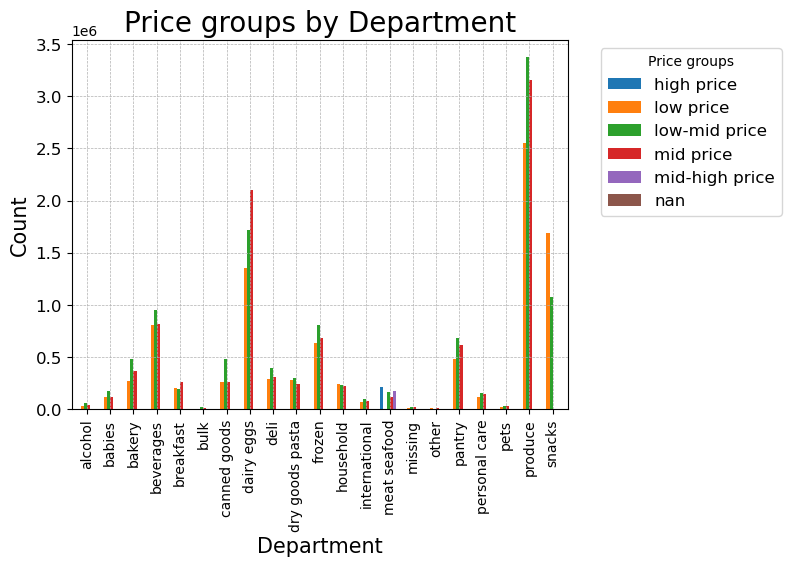

In [56]:
# Creating bar chart to visualize the data distribution

bar_Price_goods = plt.figure(figsize=(30, 8))
Price_goods.plot(kind='bar', width=0.8)

# Add Title and tags
plt.title('Price groups by Department', fontsize=20)
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Adjust the y-axis label size
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Place the legend outside the plot
plt.legend(title='Price groups', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)


In [12]:
loyalty_count = df_total_high_dept['loyalty_flag'].value_counts()

In [13]:
#Checking data

loyalty_count

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

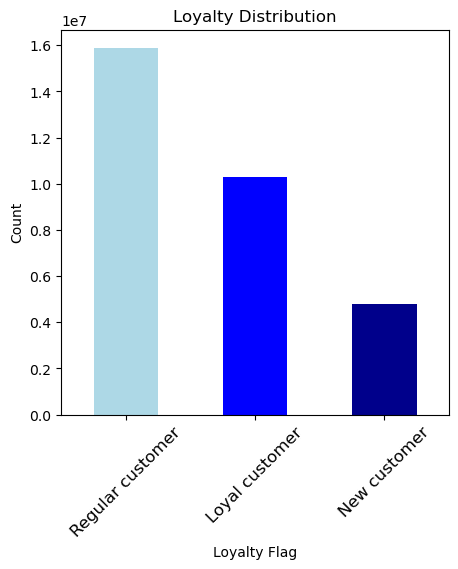

In [14]:
#Creating bar chart to visualise the different age groups 

Bar_loyalty=plt.figure(figsize=(5, 5))
loyalty_count.plot(kind='bar', color=['lightblue','blue','darkblue'])

# Add Title and tags
plt.title('Loyalty Distribution')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)


(-1.0999999605754842,
 1.099999697041771,
 -1.099999858470068,
 1.0999999932604794)

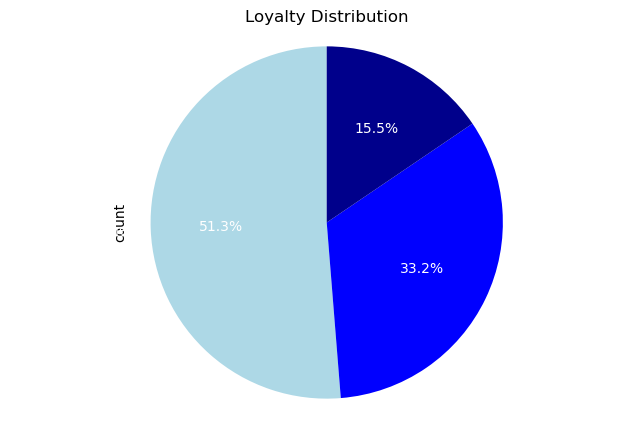

In [15]:
# Creating pie chart to visualize the different age groups
fig, ax = plt.subplots(figsize=(5, 5))
loyalty_count.plot(
    kind='pie', 
    ax=ax, 
    autopct='%1.1f%%', 
    colors=['lightblue', 'blue', 'darkblue'], 
    startangle=90, 
    textprops={'color': 'white'}
)

# Add Title and remove x and y labels (not applicable for pie chart)
plt.title('Loyalty Distribution')


# Ensure equal aspect ratio so that pie is drawn as a circle.
ax.axis('equal')

In [16]:
region_count = df_total_high_dept['region'].value_counts()

In [17]:
region_count

region
South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: count, dtype: int64

(-1.0999991894379317,
 1.0999829782919266,
 -1.0999995298688567,
 1.0999999776128027)

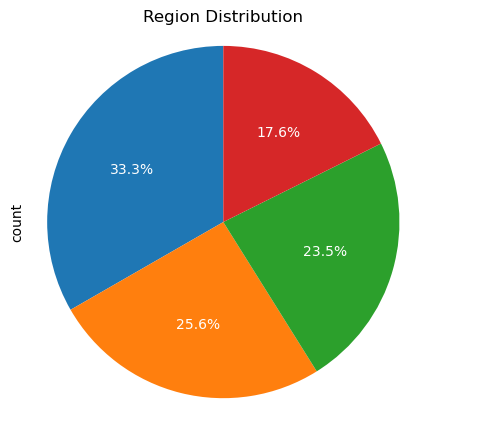

In [19]:
# Creating pie chart to visualize the regions
fig, ax = plt.subplots(figsize=(5, 5))
region_count.plot(
    kind='pie', 
    ax=ax, 
    autopct='%1.1f%%', 
    startangle=90, 
    textprops={'color': 'white'},
    labels=region_count.index  # This will add the region names
)

# Add Title and remove x and y labels (not applicable for pie chart)
plt.title('Region Distribution')

# Ensure equal aspect ratio so that pie is drawn as a circle.
ax.axis('equal')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Midwest'),
  Text(3, 0, 'Northeast')])

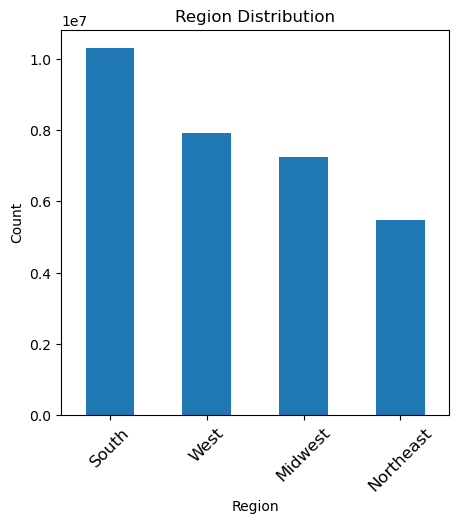

In [20]:
#Creating bar chart to visualise the different age groups 

Bar_region=plt.figure(figsize=(5, 5))
region_count.plot(kind='bar')

# Add Title and tags
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)


In [25]:
#

dependants_count = df_total_high_dept['n_dependants'].value_counts()

In [26]:
#checking data

dependants_count

n_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '3'), Text(1, 0, '0'), Text(2, 0, '2'), Text(3, 0, '1')])

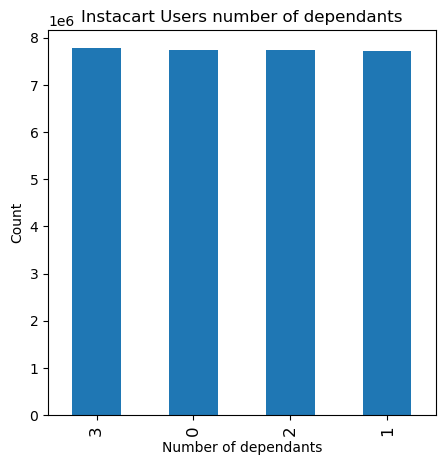

In [32]:
#Creating bar chart to visualise the different age groups 

Bar_region=plt.figure(figsize=(5, 5))
dependants_count.plot(kind='bar')

# Add Title and tags
plt.title('Instacart Users number of dependants')
plt.xlabel('Number of dependants')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)

In [36]:
#Creating dependant_status flag 

df_total_high_dept.loc[df_total_high_dept['n_dependants'] == 0, 'dependant_status'] = 'No dependants'
df_total_high_dept.loc[df_total_high_dept['n_dependants'] >= 1, 'dependant_status'] = 'Has dependants'

In [37]:
dependancy_status_count = df_total_high_dept['dependant_status'].value_counts()

(-1.0999999411854176,
 1.0999999971993002,
 -1.0999999409181958,
 1.0999999971865808)

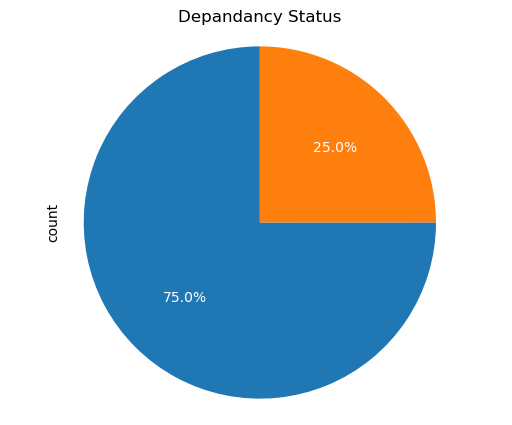

In [39]:
# Creating pie chart to visualize the regions
fig, ax = plt.subplots(figsize=(5, 5))
dependancy_status_count.plot(
    kind='pie', 
    ax=ax, 
    autopct='%1.1f%%', 
    startangle=90, 
    textprops={'color': 'white'},
    labels=dependancy_status_count.index  # This will add the dependency status labels
)

# Add Title and remove x and y labels (not applicable for pie chart)
plt.title('Dependancy Status')

# Ensure equal aspect ratio so that pie is drawn as a circle.
ax.axis('equal')

In [42]:
# Create the crosstab department and age_groups

age_department = pd.crosstab(df_total_high_dept['department'], df_total_high_dept['age_group'], dropna=False)

In [43]:
#Checking data

age_department

age_group,Middle-aged Adult,Senior,Young,Young- Adult
department,,,,
alcohol,68564,45628,8283,22152
babies,193303,133019,19831,64239
bakery,527216,366017,51629,175966
beverages,1207973,844687,117392,401849
breakfast,315676,217539,32020,105615
bulk,15562,10929,1595,5365
canned goods,474345,329485,47597,160647
dairy eggs,2432962,1687944,243669,812607
deli,471114,328967,46805,156948


<Figure size 3000x800 with 0 Axes>

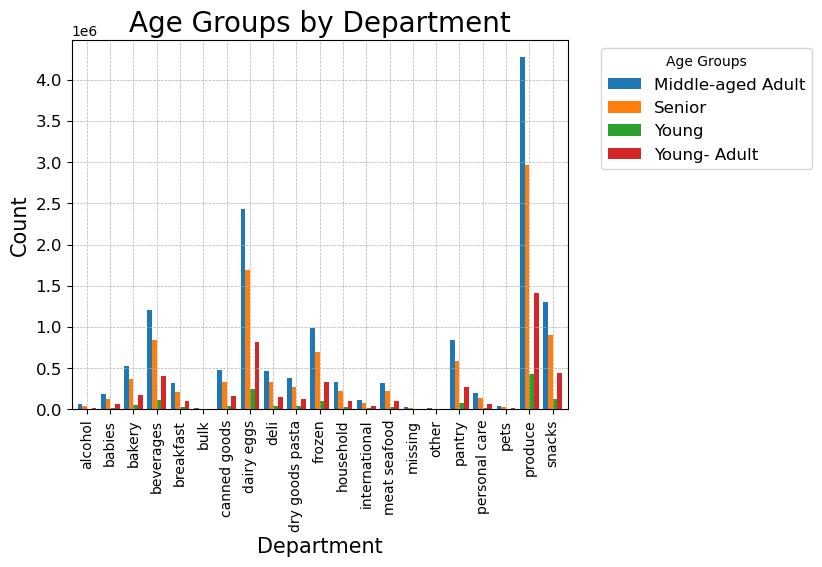

In [46]:
# Creating bar chart to visualize the data distribution
bar_age_depart = plt.figure(figsize=(30, 8))
age_department.plot(kind='bar', width=0.8)

# Add Title and tags
plt.title('Age Groups by Department', fontsize=20)
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Adjust the y-axis label size
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Place the legend outside the plot
plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)


In [53]:
# Create the crosstab department and income

income_department = pd.crosstab(df_total_high_dept['department'], df_total_high_dept['income_group'], dropna=False)

In [54]:
# Checking data

income_department

income_group,High income,Low income,Mid income,Mid-High income
department,,,,
alcohol,2815,18047,57438,66327
babies,697,29240,184456,195999
bakery,4877,106757,486368,522826
beverages,9291,383121,1062343,1117146
breakfast,2373,91408,281848,295221
bulk,5,4676,14557,14213
canned goods,3856,78975,447873,481370
dairy eggs,16649,502363,2268659,2389511
deli,2805,106448,435297,459284


<Figure size 3000x800 with 0 Axes>

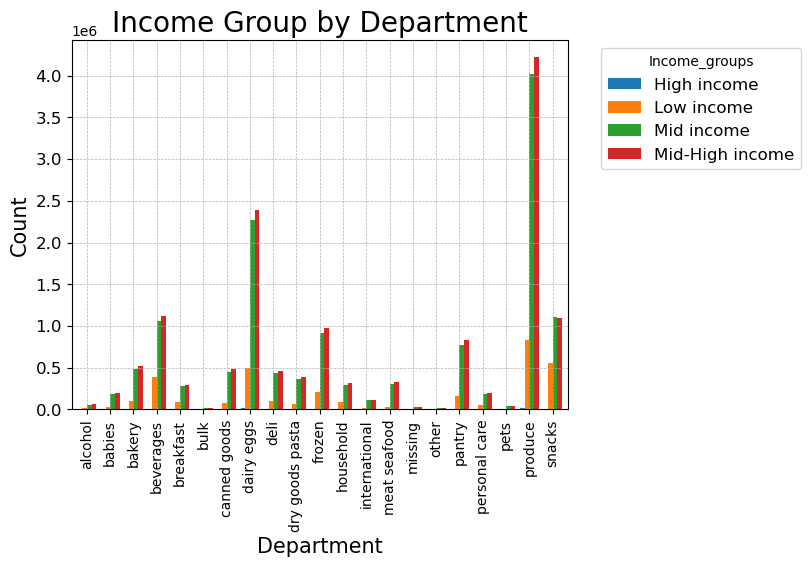

In [57]:
# Creating bar chart to visualize the data distribution

bar_Income_Depart = plt.figure(figsize=(30, 8))
income_department.plot(kind='bar', width=0.8)

# Add Title and tags
plt.title('Income Group by Department', fontsize=20)
plt.xlabel('Department', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Adjust the y-axis label size
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Place the legend outside the plot
plt.legend(title='Income_groups', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)